In [1]:
%%time
import pickle, uproot
import pandas as pd
import numpy as np
import awkward as ak

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

CPU times: user 1.7 s, sys: 209 ms, total: 1.91 s
Wall time: 2.85 s


In [2]:
fname_HCC_M20 = "/eos/cms/store/cmst3/group/l1tr/gpetrucc/fatjets/fatJetNTuple_MSSM_Hcc_M20_Pt100_PU200.125X_v0.0.root"
f_HCC_M20 = uproot.open(fname_HCC_M20)

In [3]:
data_HCC_M20 = f_HCC_M20["Events"].arrays(filter_name = "/(GenTruth|SC8Jet)_(pt|pdgId|eta|phi)/", 
#     entry_stop = 1e1, 
    how = "zip")
nSC8Jet = f_HCC_M20["Events"].arrays(filter_name = "/(nSC8Jet)/", 
#     entry_stop = 1e1, 
    how = "zip")
#Mother_pt = data_HCC
print(data_HCC_M20.GenTruth.eta[6920,:])
print(data_HCC_M20.SC8Jet.eta[6920,:])
print(np.size(data_HCC_M20.SC8Jet.eta[:,1]))
print(ak.to_numpy(data_HCC_M20.SC8Jet.pt[1,:]))
print(data_HCC_M20.SC8Jet.fields)

[-1.52, -1.54, -1.51]
[-0.904, -1.5, 2.18, -2.11, -1.48, -1.68, -1.95]
6921
[126.5   79.5   45.25  20.5   19.75  19.5   16.    10.75  10.75   9.75
   8.75   8.75   7.75   7.75   7.75]
['eta', 'phi', 'pt']


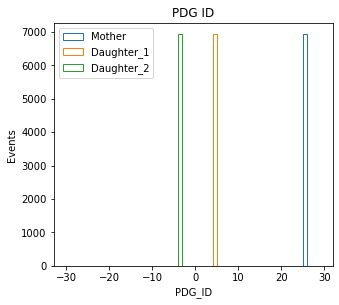

In [4]:
for obj in ['GenTruth']:
    fig = plt.figure(figsize = (5,5))#figsize = (8,4))
    fig.subplots_adjust(top=0.8)

    for label, data in zip(["data"], [data_HCC_M20]):
        num = ak.ravel(data[obj].pdgId[:,0])
        plt.hist(num, label = "Mother", bins = range(-30,30), density = False, 
                 #log = True, 
                 histtype = "step")
    for label, data in zip(["data"], [data_HCC_M20]):
        num = ak.ravel(data[obj].pdgId[:,1])
        plt.hist(num, label = "Daughter_1", bins = range(-30,30), density = False, 
                 #log = True, 
                 histtype = "step")
    for label, data in zip(["data"], [data_HCC_M20]):
        num = ak.ravel(data[obj].pdgId[:,2])
        plt.hist(num, label = "Daughter_2", bins = range(-30,30), density = False, 
                 #log = True, 
                 histtype = "step")
    plt.title("PDG ID")    
    plt.xlabel("PDG_ID")
    plt.ylabel("Events")
    plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


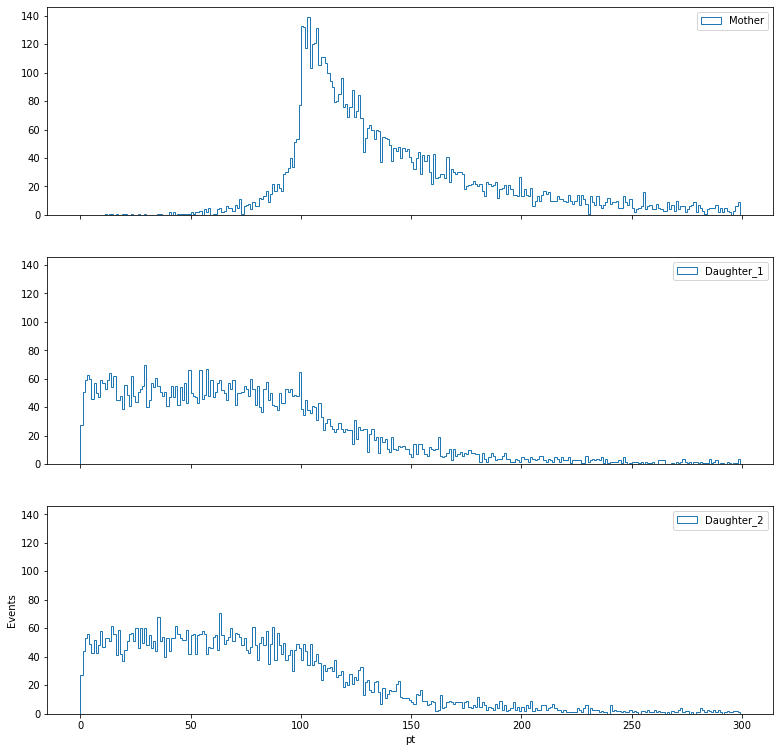

In [5]:
for obj in ['GenTruth']:
    fig, ax = plt.subplots(3, sharex = True, sharey = True, figsize = (13,13))#figsize = (8,4))


    for label, data in zip(["data"], [data_HCC_M20]):
        num = ak.ravel(data[obj].pt[:,0])
        ax[0].hist(num, label = "Mother", bins = range(0,300), density = False, 
                 #log = True, 
                 histtype = "step")
    for label, data in zip(["data"], [data_HCC_M20]):
        num = ak.ravel(data[obj].pt[:,1])
        ax[1].hist(num, label = "Daughter_1", bins = range(0,300), density = False, 
                 #log = True, 
                 histtype = "step")
        plt.legend()
    for label, data in zip(["data"], [data_HCC_M20]):
        num = ak.ravel(data[obj].pt[:,2])
        ax[2].hist(num, label = "Daughter_2", bins = range(0,300), density = False, 
                 #log = True, 
                 histtype = "step")
        
    plt.xlabel("pt")
    plt.ylabel("Events")
    ax[0].legend()
    ax[1].legend()
    ax[2].legend()
    plt.show

In [6]:
#Q = ROOT::VecOps::DeltaR(data_HCC_M20.GenTruth.eta[:,1],data_HCC_M20.GenTruth.eta[:,2],
#                         data_HCC_M20.GenTruth.phi[:,1],data_HCC_M20.GenTruth.phi[:,2])
delta_R = np.sqrt((data_HCC_M20.GenTruth.eta[:,1] - data_HCC_M20.GenTruth.eta[:,2])**2 + 
            (data_HCC_M20.GenTruth.phi[:,1] - data_HCC_M20.GenTruth.phi[:,2])**2)                
                
print(delta_R)    


[0.408, 0.36, 0.661, 0.534, 6.09, 0.262, ... 0.235, 0.877, 0.97, 0.875, 0.3, 0.357]


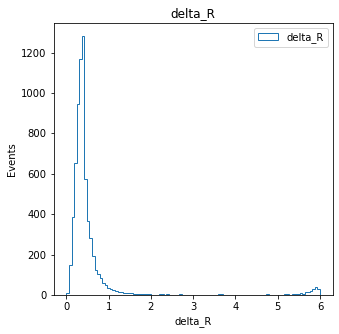

In [7]:
plt.figure(figsize = (5,5))
num = ak.ravel(delta_R)
plt.hist(num, label = "delta_R", bins = np.linspace(0,6,100), density = False, 
                 #log = True, 
                 histtype = "step")
plt.title("delta_R")    
plt.xlabel("delta_R")
plt.ylabel("Events")
plt.legend()

Text(0, 0.5, 'delta_R')

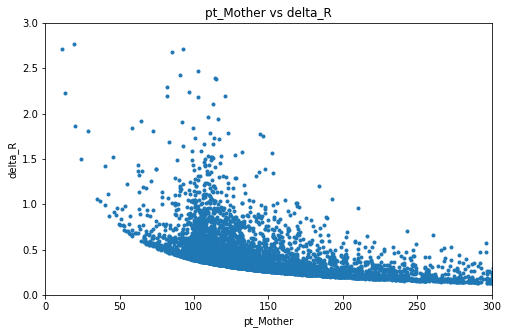

In [8]:
plt.figure(figsize = (8,5))
plt.scatter(data_HCC_M20.GenTruth.pt[:,0],delta_R, marker =".")
plt.xlim(0,300)
plt.ylim(0,3)
plt.title("pt_Mother vs delta_R")    
plt.xlabel("pt_Mother")
plt.ylabel("delta_R")

In [15]:
def iBestSC8(nSC8Jet, eta1, eta2, phi1, phi2):
    iBest = np.empty(6921)
    iBest.fill(-1)

    
    for j in range(np.size(nSC8Jet)):
        drMin = 900
        for i in range(nSC8Jet[j]):
            dr = np.sqrt((eta1[j,0] - eta2[j,i])**2 + (phi1[j,0] - phi2[j,i])**2)
            
            if dr < 0.5 and (dr < drMin):
                drMin = dr
                iBest[j] = i   #do we need more than one particle with low deltaR?? ask thea
    return iBest

iBest = iBestSC8(nSC8Jet.nSC8Jet, data_HCC_M20.GenTruth.eta, data_HCC_M20.SC8Jet.eta, data_HCC_M20.GenTruth.phi, data_HCC_M20.SC8Jet.phi)
filter_iBest = iBest > -1
new_iBest = iBest[filter_iBest]

SC8Jet_pt = []


In [16]:
for i in range(6921):
    SC8Jet_pt.append(ak.to_numpy(data_HCC_M20.SC8Jet.pt[i]))

# Assuming filter_iBest contains indices of rows to be removed
print(np.size(SC8Jet_pt))
new_SC8Jet_pt = [array for i, array in enumerate(SC8Jet_pt) if filter_iBest[i]]
print(np.size(new_iBest))
print(np.size(new_SC8Jet_pt))


6921
6828
6828


In [17]:

print(new_SC8Jet_pt[1][0])
pT = np.zeros(6828)
for i in range(6828):
    pT[i] = new_SC8Jet_pt[i][int(new_iBest[i])]
print(pT)  

126.5
[ 56.75 126.5   60.25 ... 157.5  229.25  56.25]


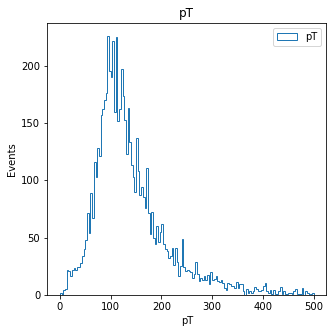

In [13]:
plt.figure(figsize = (5,5))
num = ak.ravel(pT)
plt.hist(num, label = "pT", bins = 150, range = (0,500),density = False, 
                 #log = True, 
                 histtype = "step")
plt.title("pT")    
plt.xlabel("pT")
plt.ylabel("Events")
plt.legend()